### Пет-проект на тему *Данные о пользователях и платформах*

```
Импорт библиотек pandas, seaborn & matplotlib
```

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

```
Загрузка .csv файлов с кодировкой windows-1251 и разделителем ','
```

In [9]:
user_data = pd.read_csv('https://stepik.org/media/attachments/lesson/360348/user_data.csv', 
                     encoding = 'windows-1251', 
                     sep = ',')

In [13]:
user_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [11]:
logs = pd.read_csv('https://stepik.org/media/attachments/lesson/360348/logs.csv', 
                     encoding = 'windows-1251', 
                     sep = ',')

In [14]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


```
Проверим размер таблицы user_data, типы переменных, наличие пропущенных значений, описательную статистику
```

In [15]:
user_data.shape

(2954, 3)

In [16]:
user_data.dtypes

client     int64
premium     bool
age        int64
dtype: object

In [25]:
user_data.query('client == "NaN" or premium == "NaN" or age == "NaN"')

,client,premium,age


In [81]:
user_data['age'].value_counts()

25    79
27    75
43    70
58    69
36    69
46    69
47    68
61    67
68    66
35    66
33    66
49    66
37    65
54    65
44    64
52    64
65    63
26    62
67    62
38    62
42    62
29    62
48    60
41    60
50    60
31    60
45    59
59    59
39    58
62    58
22    57
21    56
28    56
40    55
66    54
20    54
51    52
30    52
32    52
24    51
64    51
55    50
57    50
60    50
56    50
23    49
34    49
69    48
53    42
63    41
Name: age, dtype: int64

```
Проверим размер таблицы user_data, типы переменных, наличие пропущенных значений, описательную статистику
```

In [26]:
logs.shape

(4500, 4)

In [27]:
logs.dtypes

client       int64
success       bool
platform    object
time         int64
dtype: object

In [34]:
logs.query('client == "NaN" or success == "NaN" or platform == "NaN" or time == "NaN"')

,client,success,platform,time


In [76]:
logs['platform'].value_counts()

phone       2753
computer    1505
tablet       242
Name: platform, dtype: int64

>Какой клиент совершил больше всего успешных операций

In [160]:
client_success = logs.query('success == True')\
                    .groupby('client', as_index = False)\
                    .agg({'time':'count'})\
                    .sort_values(['time','client'], ascending = [False, True])\
                    .rename(columns = {'time':'success_op'})

In [161]:
client_success.query('success_op == success_op.max()')

,client,success_op
332,12179,41
810,28719,41
1020,36165,41
1487,52870,41
1758,61468,41
1759,61473,41
2231,78349,41
2345,82563,41
2626,92584,41



>С какой платформы осуществляется наибольшее количество успешных операций


In [36]:
logs.query('success == True')\
    .groupby('platform', as_index = False)\
    .agg({'success':'count'})\
    .sort_values('success', ascending = False).head(1)

,platform,success
1,phone,2019



>Какую платформу предпочитают премиальные клиенты


In [144]:
user_data.merge(logs, on = 'client')\
        .query('premium == True')\
        .groupby('platform', as_index = False)\
        .agg({'time':'count'})\
        .sort_values('time', ascending = False)\
        .rename(columns = {'time':'premium_clients'})

,platform,premium_clients
1,phone,246
0,computer,150
2,tablet,24


>Визуализируем распределение возраста клиентов в зависимости от типа клиента (премиум или нет)

C:\Users\Pc\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Pc\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

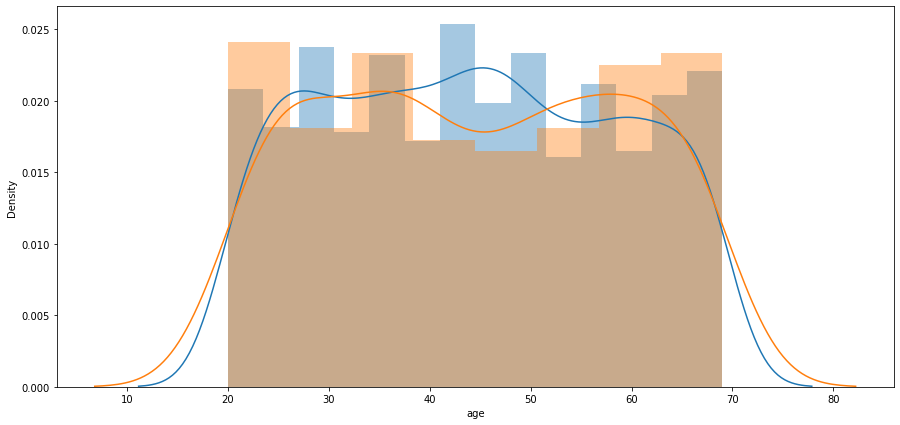

In [139]:
plt.figure(figsize=(15,7))

sns.distplot(user_data.query('premium == False').age)
sns.distplot(user_data.query('premium == True').age)


C:\Users\Pc\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Pc\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

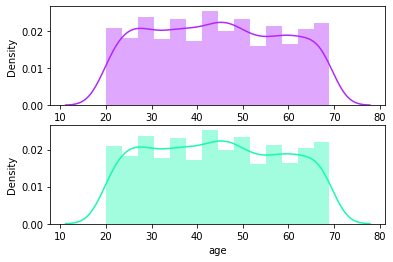

In [175]:
fig, ax = plt.subplots(2,1)

sns.distplot(user_data.query('premium == False').age, ax = ax[0], color = '#B127FE')
sns.distplot(user_data.query('premium == False').age, ax = ax[1], color = '#17FAAE')

# plt.subplot(211)
# sns.distplot(user_data.query('premium == False').age, color = '#B127FE')
# plt.subplot(212)
# sns.distplot(user_data.query('premium == True').age, color = '#17FAAE')

>Построим график распределения числа успешных операций в зависимости от числа клиентов

In [199]:
client_success

,client,success_op
332,12179,41
810,28719,41
1020,36165,41
1487,52870,41
1758,61468,41
...,...,...
2840,99926,1
2841,99927,1
2842,99931,1
2843,99973,1


<AxesSubplot:xlabel='success_op', ylabel='count'>

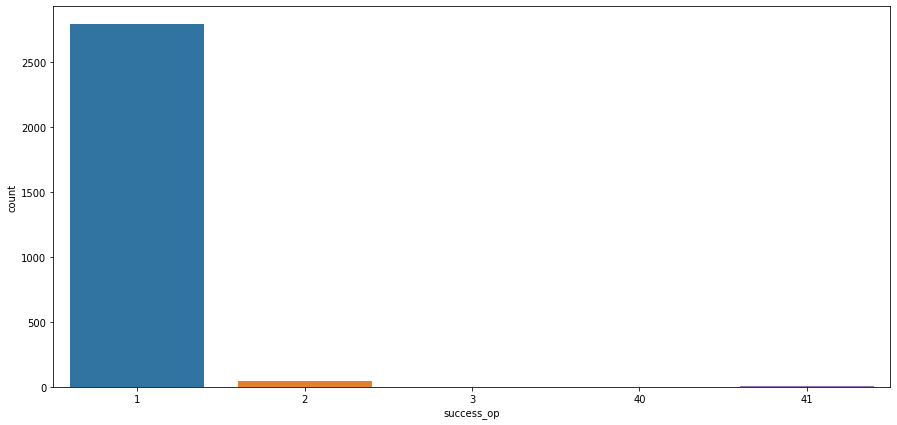

In [167]:
plt.figure(figsize = (15,7))
sns.countplot(x = client_success.success_op)

>Визуализируем число успешных операций, сделанных на платформе computer, в зависимости от возраста. 
Клиенты какого возраста совершили наибольшее количество успешных действий?

In [195]:
success_comp_op = logs.merge(user_data, on = 'client')\
                        .query('success == True and platform == "computer"')
success_comp_op

,client,success,platform,time,premium,age
1,61468,True,computer,1585460504,False,25
2,61468,True,computer,1585430291,False,25
3,61468,True,computer,1585444317,False,25
7,61468,True,computer,1585416826,False,25
11,61468,True,computer,1585428874,False,25
...,...,...,...,...,...,...
3409,4293,True,computer,1585403129,False,29
3425,16540,True,computer,1585456144,False,49
3432,85769,True,computer,1585447052,False,46
3433,81031,True,computer,1585401631,False,45


<AxesSubplot:xlabel='age', ylabel='count'>

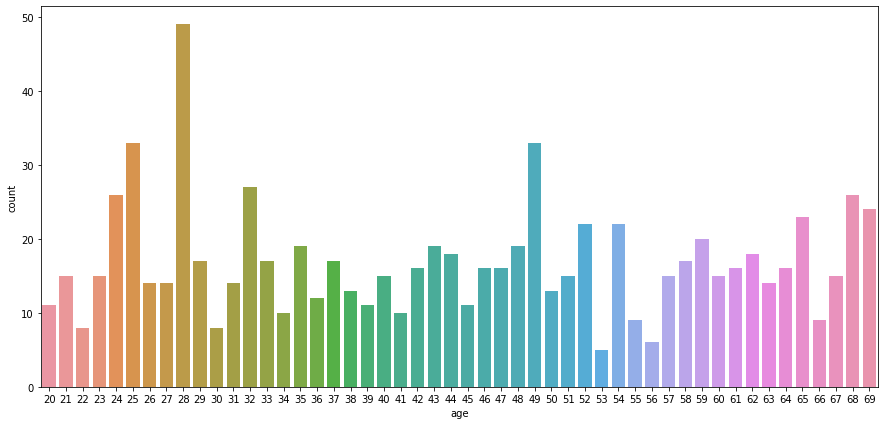

In [198]:
plt.figure(figsize = (15,7))
sns.countplot(x = 'age', data = success_comp_op)